# 類別

In [1]:
# 預處理
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf

dataset = pd.read_csv('Part1Data.csv')

In [2]:
# 設定答案
dataset_target = dataset.pop('IsoverAVE')
dataset = dataset.drop("Zone1PowerConsumption",axis = 1)
dataset = dataset.drop("Zone2PowerConsumption",axis = 1)
dataset = dataset.drop("Zone3PowerConsumption",axis = 1)
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset , dataset_target , test_size = 0.2)
print(X_train.shape , X_test.shape)

(41932, 5) (10484, 5)


In [4]:
# 正規化
X_train = X_train.values.reshape(41932, 5)
X_test = X_test.values.reshape(10484, 5)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#正規化測試資料 (0到1之間)
X_train /= 255
X_test /= 255

#標籤向量化
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [5]:
#建構模型
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc',precision, recall])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              6000      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=250,validation_data=(X_test, Y_test))

Epoch 1/50
168/168 [==============================] - 0s 3ms/step - loss: 0.6665 - acc: 0.6268 - precision: 0.6780 - recall: 0.4569 - val_loss: 0.6506 - val_acc: 0.6433 - val_precision: 0.6896 - val_recall: 0.5051
Epoch 2/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6142 - acc: 0.6540 - precision: 0.6737 - recall: 0.5921 - val_loss: 0.6021 - val_acc: 0.6588 - val_precision: 0.6681 - val_recall: 0.6122
Epoch 3/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5992 - acc: 0.6620 - precision: 0.6647 - recall: 0.6512 - val_loss: 0.5995 - val_acc: 0.6594 - val_precision: 0.6793 - val_recall: 0.5858
Epoch 4/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5937 - acc: 0.6672 - precision: 0.6633 - recall: 0.6778 - val_loss: 0.5911 - val_acc: 0.6673 - val_precision: 0.6658 - val_recall: 0.6541
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5920 - acc: 0.6659 - precision: 0.6589 - recall: 0.6881 - val_loss: 

168/168 [==============================] - 0s 2ms/step - loss: 0.5639 - acc: 0.6860 - precision: 0.7047 - recall: 0.6403 - val_loss: 0.5773 - val_acc: 0.6853 - val_precision: 0.7594 - val_recall: 0.5320
Epoch 40/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5638 - acc: 0.6880 - precision: 0.7086 - recall: 0.6405 - val_loss: 0.5645 - val_acc: 0.6820 - val_precision: 0.6870 - val_recall: 0.6554
Epoch 41/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5631 - acc: 0.6895 - precision: 0.7090 - recall: 0.6417 - val_loss: 0.5635 - val_acc: 0.6771 - val_precision: 0.6719 - val_recall: 0.6801
Epoch 42/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5624 - acc: 0.6903 - precision: 0.7128 - recall: 0.6406 - val_loss: 0.5756 - val_acc: 0.6726 - val_precision: 0.6510 - val_recall: 0.7304
Epoch 43/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5614 - acc: 0.6911 - precision: 0.7125 - recall: 0.6378 - val_loss: 0.5857 

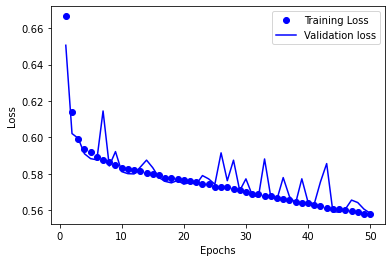

In [7]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
preds = network.evaluate(x = X_test, y = Y_test)

F1 = 2 * (preds[2] * preds[3]) / (preds[2] + preds[3])
print('Precision', preds[2])
print('Recall', preds[3])
print('F1',F1)

328/328 [==============================] - 0s 526us/step - loss: 0.5584 - acc: 0.6841 - precision: 0.7233 - recall: 0.5878
Precision 0.7232587933540344
Recall 0.587783932685852
F1 0.6485218055270683


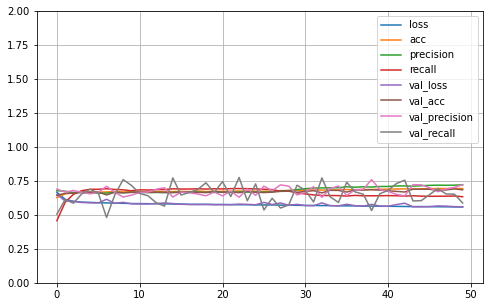

In [9]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [10]:
dataset

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,6.559,73.8,0.083,0.051,0.119
1,6.414,74.5,0.083,0.070,0.085
2,6.313,74.5,0.080,0.062,0.100
3,6.121,75.0,0.083,0.091,0.096
4,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096
52412,6.947,72.6,0.082,0.051,0.093
52413,6.900,72.8,0.086,0.084,0.074
52414,6.758,73.0,0.080,0.066,0.089


# 數值

In [11]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error#MAPE
import tensorflow as tf
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [12]:
#匯入資料
dataset = pd.read_csv('Part1Data.csv')

In [13]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset)
dataset_2 = pd.DataFrame(dataset_1,columns=dataset.columns)
dataset_2

# 設定答案
dataset_target = dataset_2.pop('Zone1PowerConsumption')
dataset_target.loc()[dataset_target == 0]= dataset_target.mean()
#丟棄不需用到的資料
dataset_2 = dataset_2.drop("Zone2PowerConsumption",axis = 1)
dataset_2 = dataset_2.drop("Zone3PowerConsumption",axis = 1)
dataset_2 = dataset_2.drop("general diffuse flows",axis = 1)
dataset_2 = dataset_2.drop("diffuse flows",axis = 1)
dataset_2 = dataset_2.drop("IsoverAVE",axis = 1)

In [14]:
X_test

array([[7.9215690e-02, 3.2941177e-01, 2.5490194e-04, 7.2627449e-01,
        7.7529413e-01],
       [3.8901962e-02, 3.2196078e-01, 3.2941176e-04, 1.6039217e-01,
        1.6043137e-01],
       [6.9529407e-02, 2.8588235e-01, 1.9274510e-02, 8.6274507e-05,
        6.3921569e-04],
       ...,
       [2.1886274e-02, 3.3058825e-01, 1.9266667e-02, 8.1098042e-03,
        7.8980392e-03],
       [6.1764706e-02, 2.9882351e-01, 3.0980393e-04, 1.0196079e-04,
        5.9607840e-04],
       [4.0627450e-02, 2.8941178e-01, 3.4117646e-04, 1.5686275e-04,
        4.6666668e-04]], dtype=float32)

In [15]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset_2 , dataset_target , test_size = 0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41932, 3)
(10484, 3)
(10484,)


In [17]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=50)

Epoch 1/50
839/839 [==============================] - 0s 529us/step - loss: 0.0297 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 37.6314 - mean_squared_error: 0.0297
Epoch 2/50
839/839 [==============================] - 0s 548us/step - loss: 0.0272 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 36.4265 - mean_squared_error: 0.0272
Epoch 3/50
839/839 [==============================] - 0s 524us/step - loss: 0.0272 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 36.3663 - mean_squared_error: 0.0272
Epoch 4/50
839/839 [==============================] - 0s 529us/step - loss: 0.0271 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 36.2516 - mean_squared_error: 0.0271
Epoch 5/50
839/839 [==============================] - 0s 531us/step - loss: 0.0270 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 35.9399 - mean_squared_error: 0.0270
Epoch 6/50
839/839 [==============================] - 0s 545us/step - loss: 0.02

839/839 [==============================] - 0s 517us/step - loss: 0.0259 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 35.1876 - mean_squared_error: 0.0259
Epoch 46/50
839/839 [==============================] - 1s 638us/step - loss: 0.0259 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 35.1879 - mean_squared_error: 0.0259
Epoch 47/50
839/839 [==============================] - 1s 600us/step - loss: 0.0259 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 35.2390 - mean_squared_error: 0.0259
Epoch 48/50
839/839 [==============================] - 0s 553us/step - loss: 0.0259 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 35.2370 - mean_squared_error: 0.0259
Epoch 49/50
839/839 [==============================] - 0s 544us/step - loss: 0.0259 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 35.1662 - mean_squared_error: 0.0259
Epoch 50/50
839/839 [==============================] - 0s 585us/step - loss: 0.0259 - m

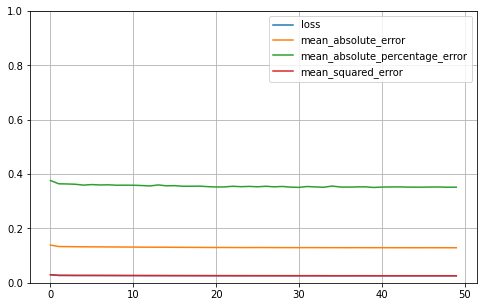

In [19]:
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
network.predict(X_test)

array([[0.52212274],
       [0.45746765],
       [0.6872831 ],
       ...,
       [0.46518463],
       [0.55811054],
       [0.4929194 ]], dtype=float32)

In [21]:
Y_test

46573    0.378777
44072    0.259905
28731    0.785016
2039     0.064711
47259    0.203521
           ...   
50608    0.449881
14589    0.281429
41177    0.571329
29823    0.445671
42902    0.492696
Name: Zone1PowerConsumption, Length: 10484, dtype: float64

Y_test.to_csv("AdultsDataSet_Finaltrain.csv",index=False)